<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/1.MultivariantRegression_GradientDesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns
# Import math Library
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xLabel = "Reservations"
yLabel = "Pizzas"


x1,x2,x3,y = np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/pizza_3_vars.txt",skiprows=1, unpack=True)
bias=np.ones(x1.size)
X = np.column_stack((bias,x1, x2, x3))


In [ ]:
Y = y.reshape(-1, 1)

In [ ]:
print(f"Xshape={X.shape} yshape={y.shape} Yshape={Y.shape}")



Xshape=(30, 4) yshape=(30,) Yshape=(30, 1)


In [ ]:
w=np.zeros((X.shape[1],1))
print(f"w={w.shape}")

w=(4, 1)


In [ ]:
def predict(X,w):
  return np.matmul(X,w)

In [ ]:
def loss(X, Y, w):
  return np.average((predict(X,w) - Y) ** 2)

In [ ]:
a_number = loss(X,Y,w)
a_number.shape

()

In [ ]:
def gradient(X,Y,w):
  error=predict(X,w) - Y
  return 2 * np.matmul(X.T, (error)) / X.shape[0]

In [ ]:
def train(X,Y, iterations, lr):
  w=np.zeros((X.shape[1], 1))
  for i in range(iterations):
    print(f"iteration {i} => loss {loss(X,Y,w)}")
    w -= gradient(X, Y, w) * lr
  return w

In [ ]:
w = train(X,Y, iterations=100000, lr=0.001)

Streaming output truncated to the last 5000 lines.
iteration 95000 => loss 6.69817844993403
iteration 95001 => loss 6.698178449857249
iteration 95002 => loss 6.698178449780481
iteration 95003 => loss 6.698178449703716
iteration 95004 => loss 6.698178449626967
iteration 95005 => loss 6.698178449550229
iteration 95006 => loss 6.6981784494735
iteration 95007 => loss 6.698178449396776
iteration 95008 => loss 6.698178449320068
iteration 95009 => loss 6.698178449243371
iteration 95010 => loss 6.698178449166688
iteration 95011 => loss 6.698178449090006
iteration 95012 => loss 6.6981784490133425
iteration 95013 => loss 6.698178448936685
iteration 95014 => loss 6.698178448860033
iteration 95015 => loss 6.698178448783403
iteration 95016 => loss 6.698178448706775
iteration 95017 => loss 6.698178448630156
iteration 95018 => loss 6.69817844855355
iteration 95019 => loss 6.698178448476953
iteration 95020 => loss 6.698178448400371
iteration 95021 => loss 6.6981784483238
iteration 95022 => loss 6.6981

In [ ]:
print(f"weights:{w.T}")
print(f"Predictions:")
pdWeights = []
for i in range(5):
  prediction={}
  prediction["prediction"] = predict(X[i], w)[0]
  prediction["label"] =Y[i][0]
  print(f"X[{i}] -> {prediction.get('prediction')} (label:{prediction['label']})")
  pdWeights.append(prediction)

weights:[[ 2.41178207  1.23368396 -0.02689984  3.12460558]]
Predictions:
X[0] -> 45.871727850231466 (label:44.0)
X[1] -> 23.250185664325237 (label:23.0)
X[2] -> 28.519177396316298 (label:28.0)
X[3] -> 58.235467288026356 (label:60.0)
X[4] -> 42.800921956470276 (label:42.0)


In [ ]:
import pandas as pd
df = pd.DataFrame(pdWeights)
df

,prediction,label
0,45.871728,44.0
1,23.250186,23.0
2,28.519177,28.0
3,58.235467,60.0
4,42.800922,42.0


In [ ]:
import pandas as pd
df = pd.DataFrame(w.reshape(1,4), columns=["bias", "reservations","temperature","tourist density"])
df

,bias,reservations,temperature,tourist density
0,2.411782,1.233684,-0.0269,3.124606


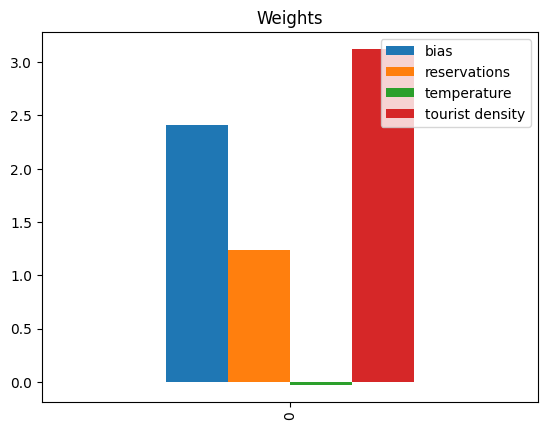

In [ ]:
# prompt: plot df

df.plot(kind="bar")
plt.title("Weights")
plt.show()
